# Importing libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [61]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [64]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
df.shape

(1338, 7)

# Exploratory Data Analysis

In [66]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [67]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [68]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Converting categorical features into numerical

In [69]:
new_data={'sex':{'male':0, 'female':1},
         'smoker':{'no':0, 'yes':1},
         'region':{'southeast': 0, 'southwest':1, 'northwest': 2, 'northeast':3}}
df.replace(new_data, inplace=True)

In [70]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [71]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


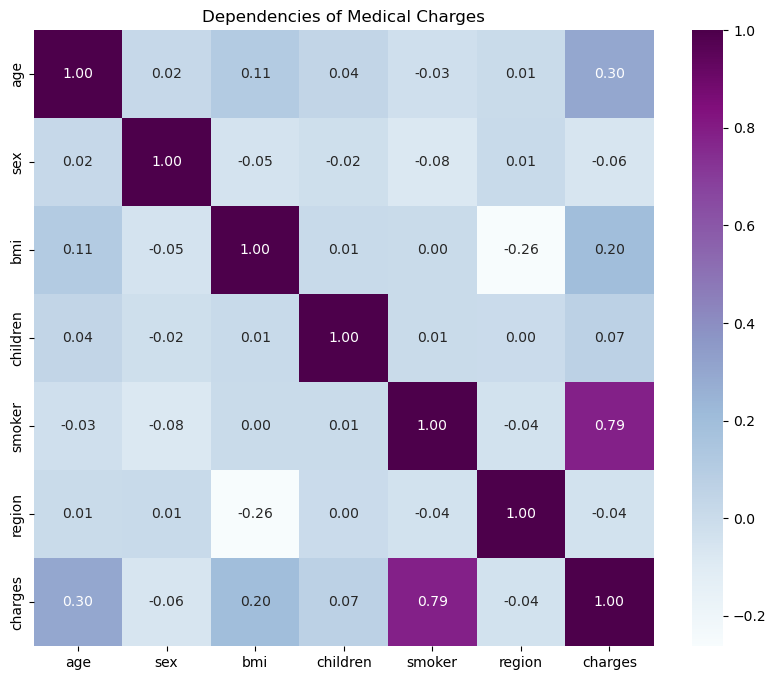

In [72]:
#plotting correlation using seaborn
corr=df.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('correlation image')
plt.show()

*We can see that Age,BMI,Smoker are most important factors that determine charges*

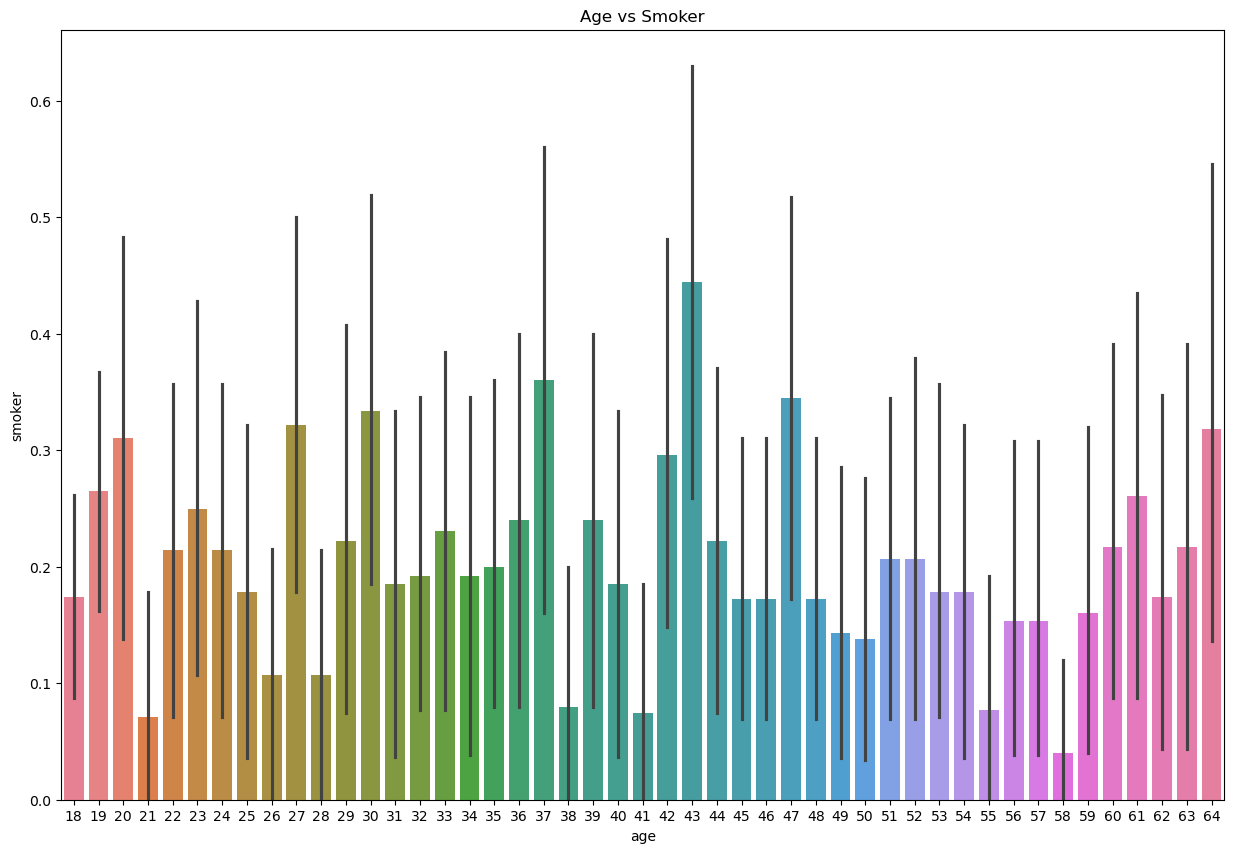

In [73]:
#Age vs Smoker
plt.figure(figsize=(15,10))
plt.title('Age vs Smoker')
sns.barplot(x='age', y='smoker', data=df, palette='husl')
plt.savefig('Age vs Smoker')

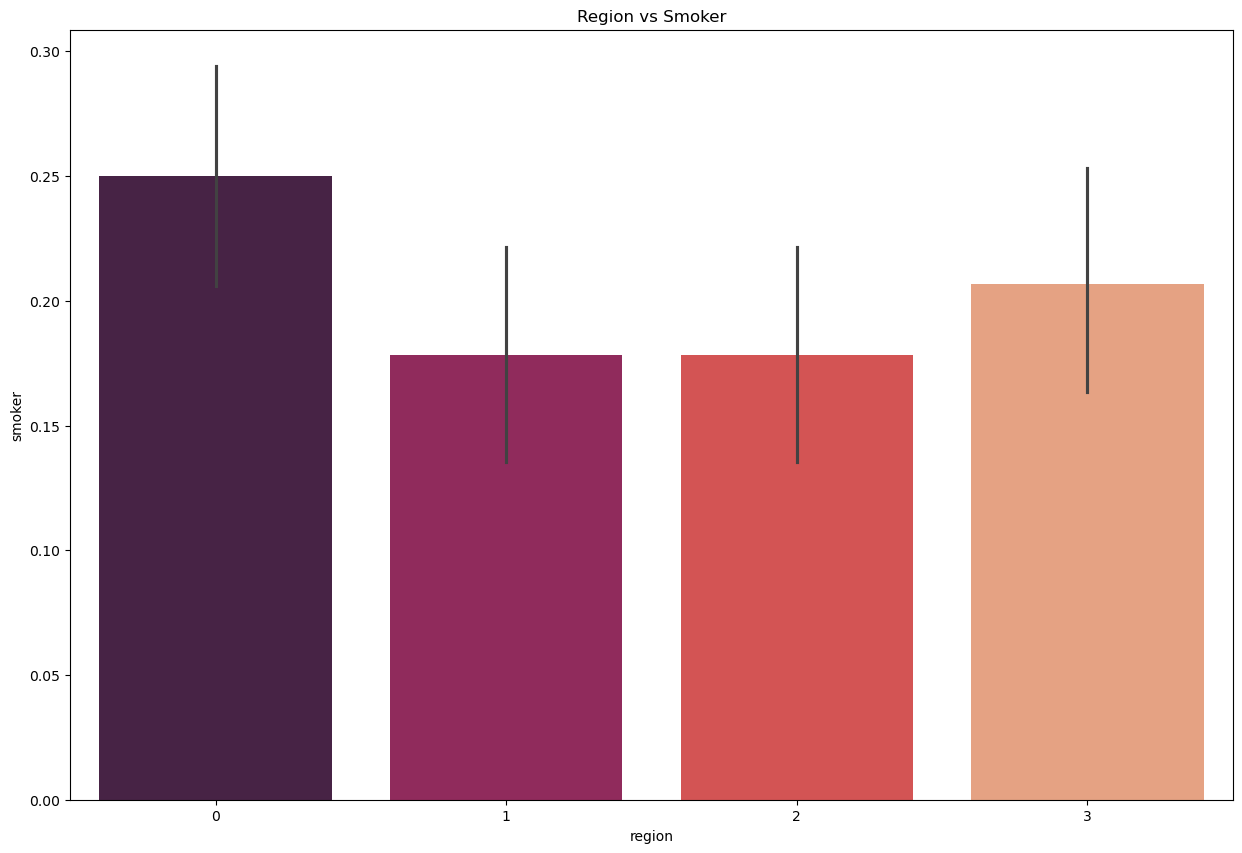

In [74]:
plt.figure(figsize=(15,10))
plt.title('Region vs Smoker')
sns.barplot(x='region', y='smoker', data=df, palette ='rocket')
plt.savefig('Region vs Smoker')

Text(0.5, 1.0, 'BMI vs Charges')

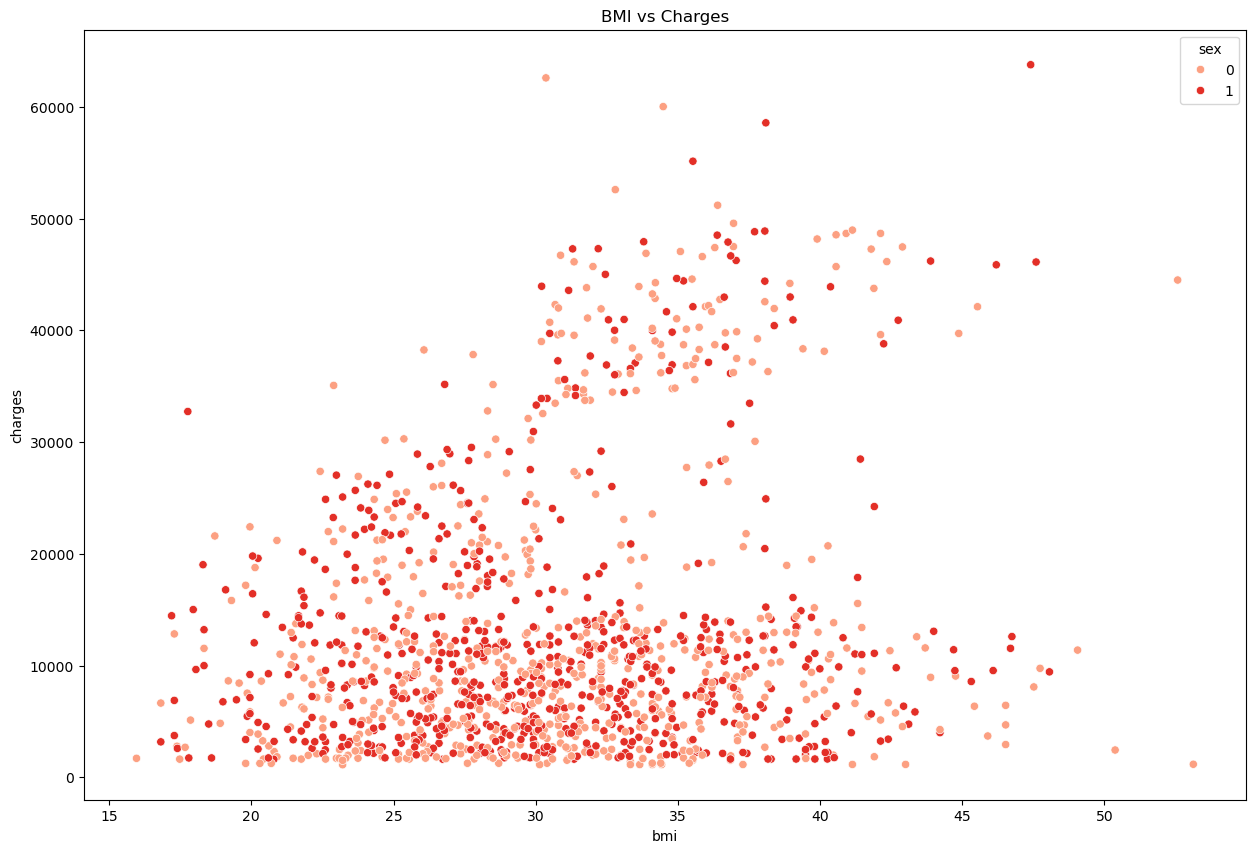

In [75]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df, palette='Reds')
plt.savefig('BMI vs Charges')
plt.title('BMI vs Charges')

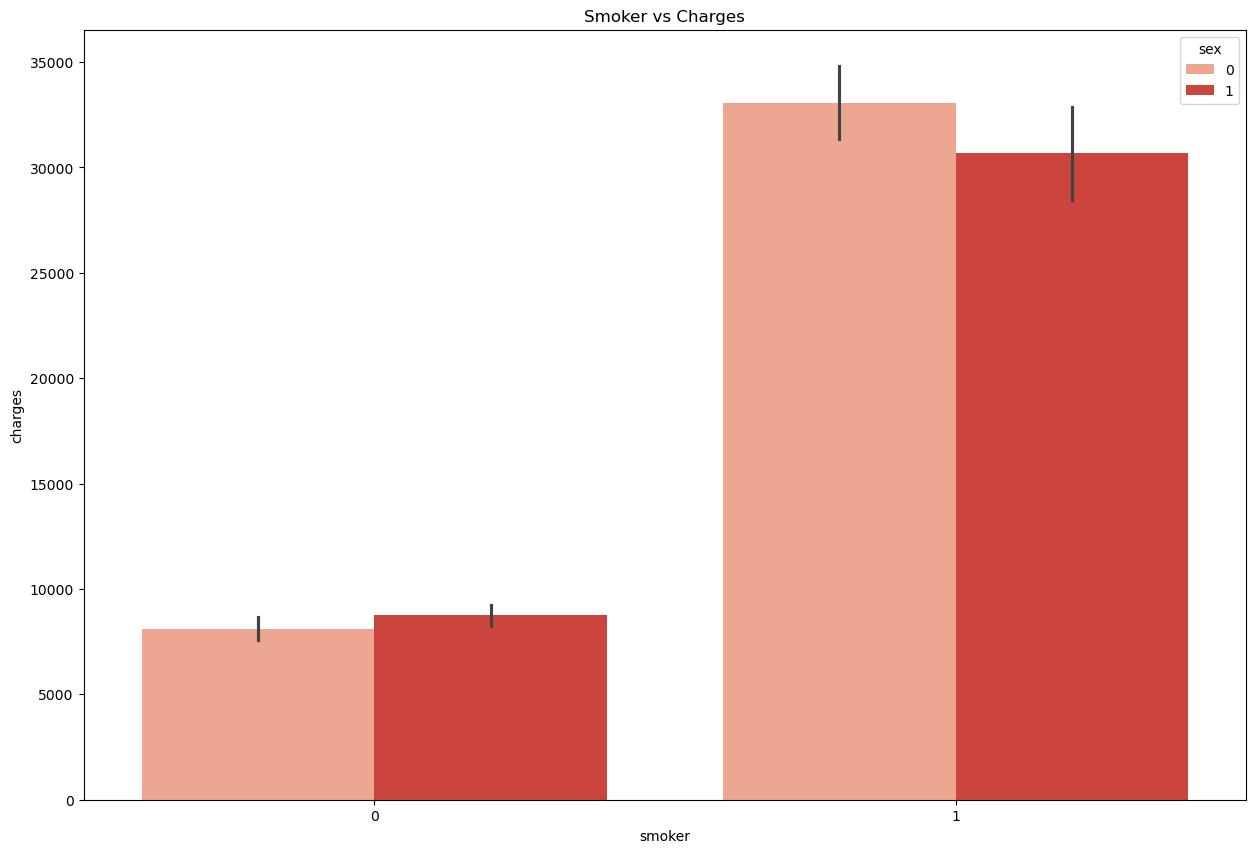

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(x='smoker', y='charges',hue='sex', data=df, palette='Reds')
plt.title('Smoker vs Charges')
plt.savefig('Smoker vs Charges')

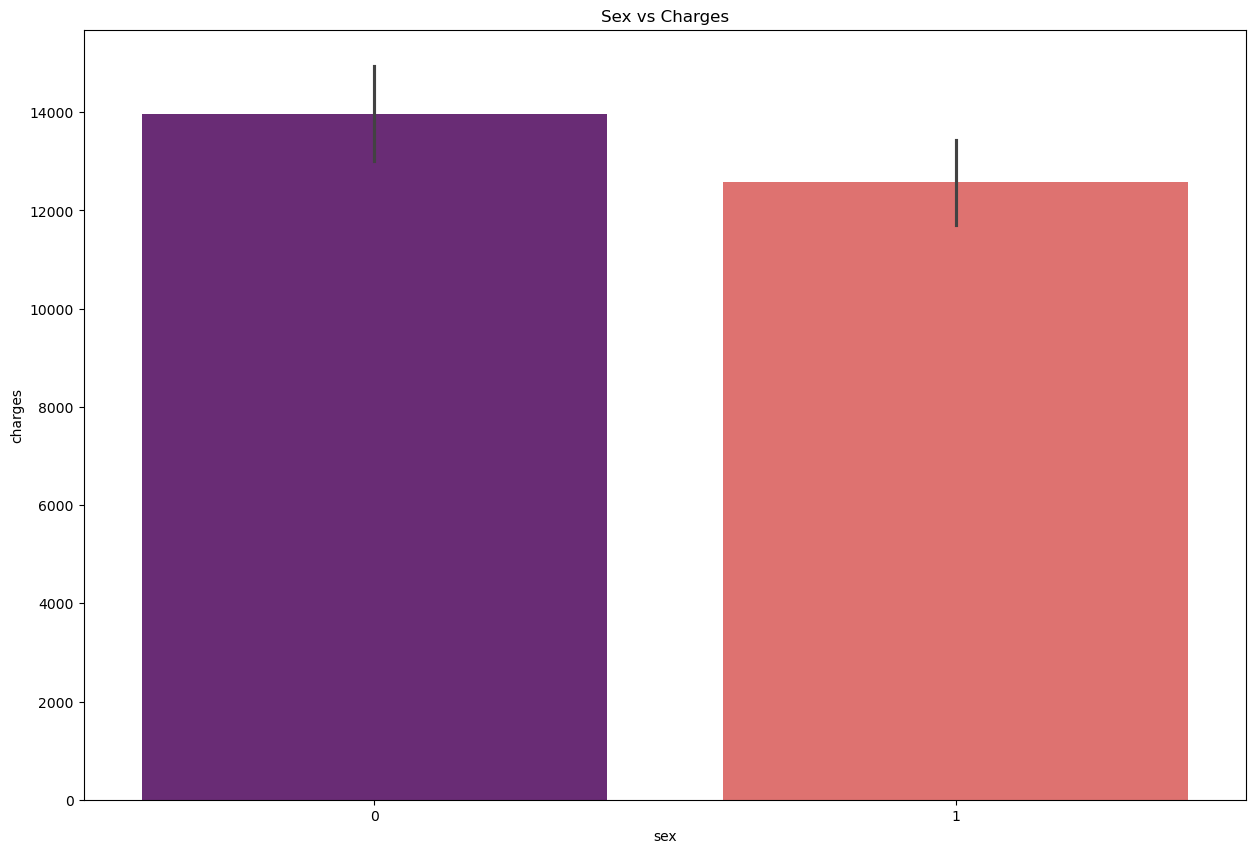

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(x='sex', y='charges', data=df, palette='magma')
plt.title('Sex vs Charges')
plt.savefig('Sex vs Charges')

## Plotting skewness and kurtosis 

In [78]:
print('Skewness and Kurtosis for all columns:')
for col in list(df.columns):
    print('{0} : Skewness {1:.3f} and Kurtosis {2:.3f}'.format(col,df[col].skew(),df[col].kurt()))

Skewness and Kurtosis for all columns:
age : Skewness 0.056 and Kurtosis -1.245
sex : Skewness 0.021 and Kurtosis -2.003
bmi : Skewness 0.284 and Kurtosis -0.051
children : Skewness 0.938 and Kurtosis 0.202
smoker : Skewness 1.465 and Kurtosis 0.146
region : Skewness 0.049 and Kurtosis -1.386
charges : Skewness 1.516 and Kurtosis 1.606


Text(0, 0.5, 'Count')

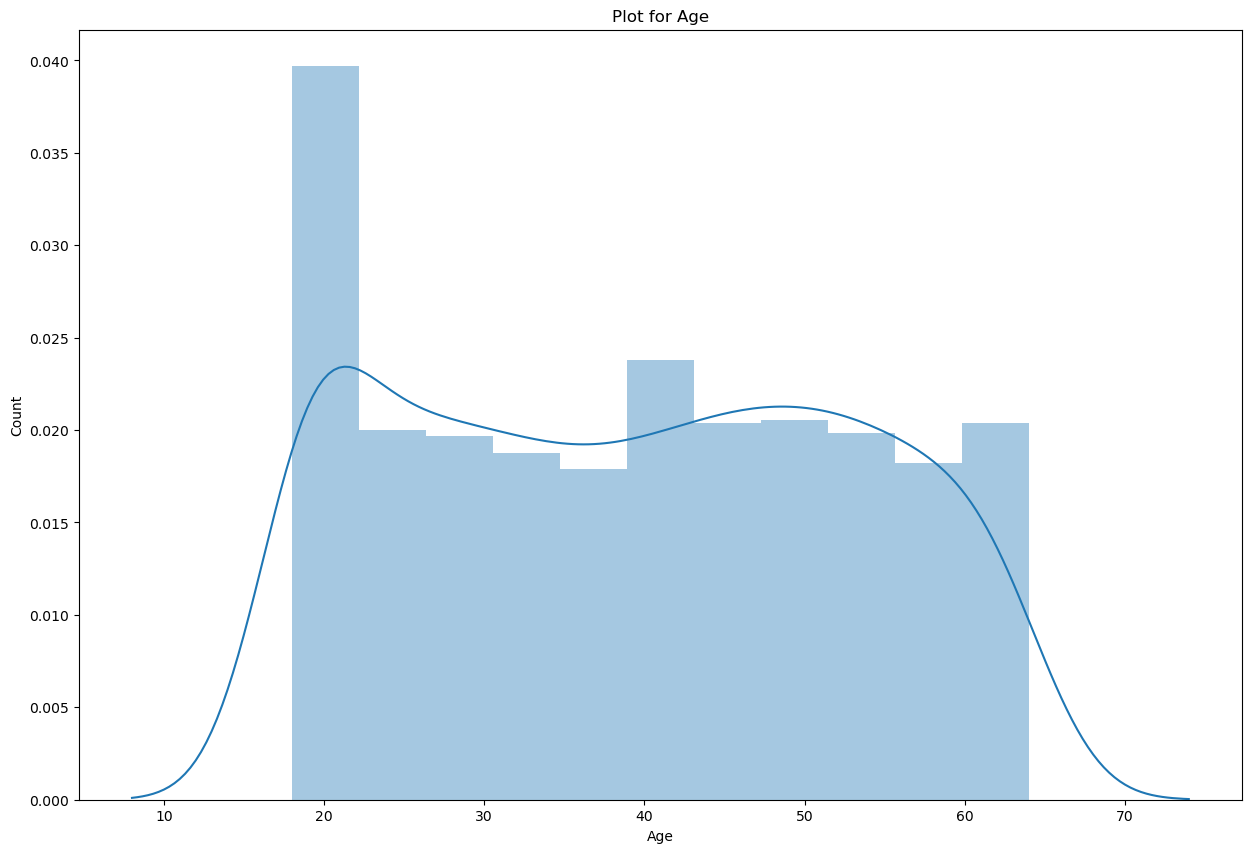

In [79]:
#plotting for age
plt.figure(figsize=(15,10))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

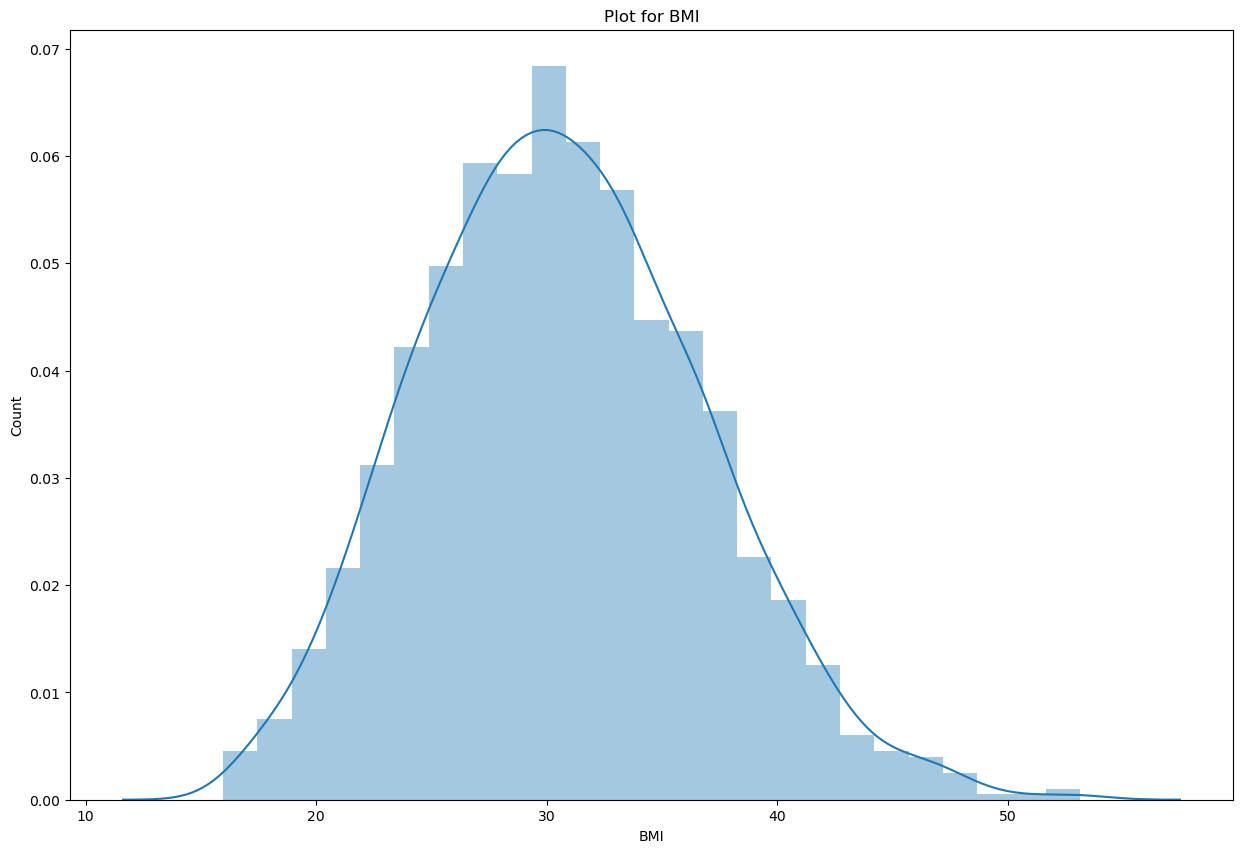

In [80]:
#plotting for bmi
plt.figure(figsize=(15,10))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

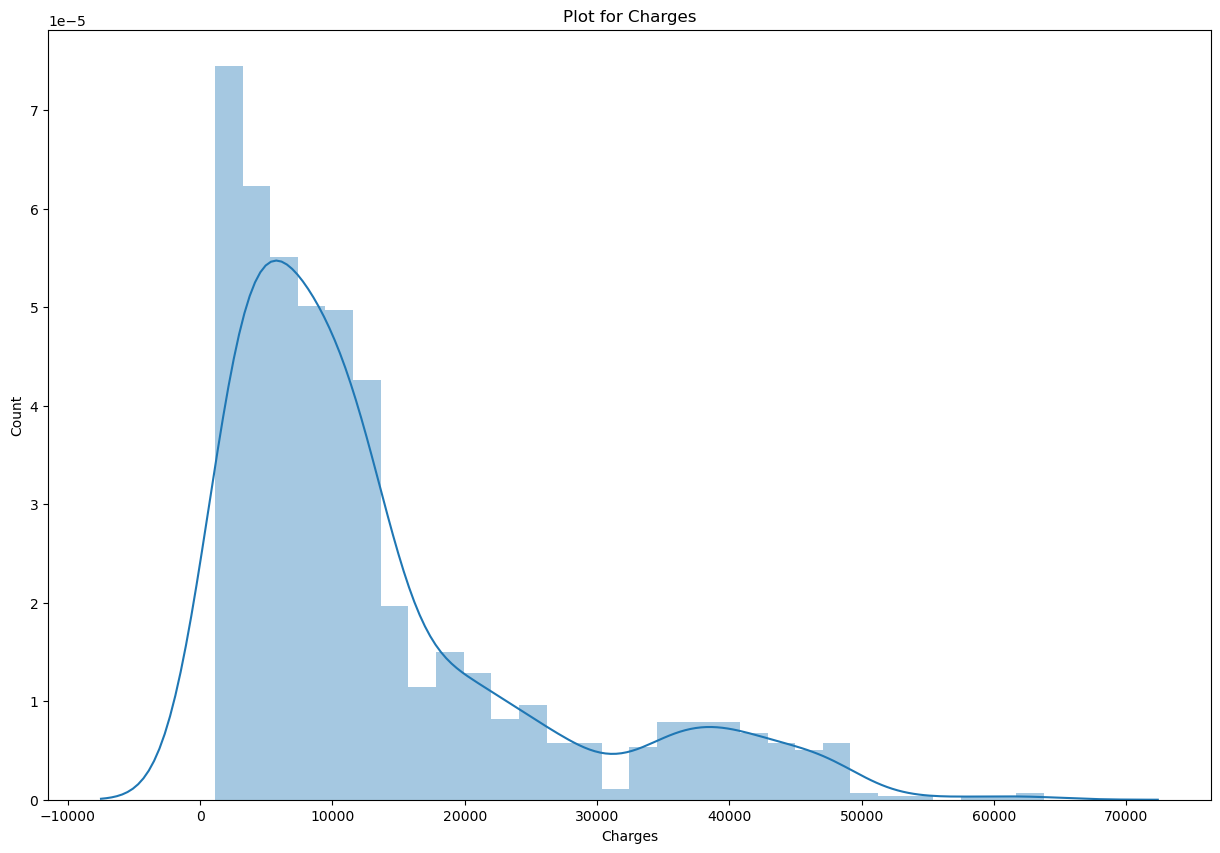

In [81]:
#plotting for smoker
plt.figure(figsize=(15,10))
sns.distplot(df['charges'])
plt.title('Plot for Charges')
plt.xlabel('Charges')
plt.ylabel('Count')

<Axes: ylabel='age'>

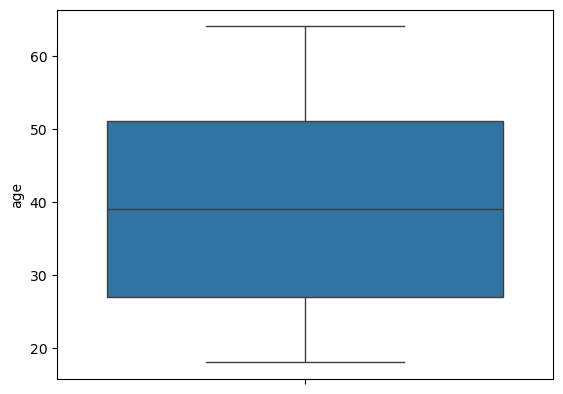

In [82]:
#plotting with boxplot to check outliers
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

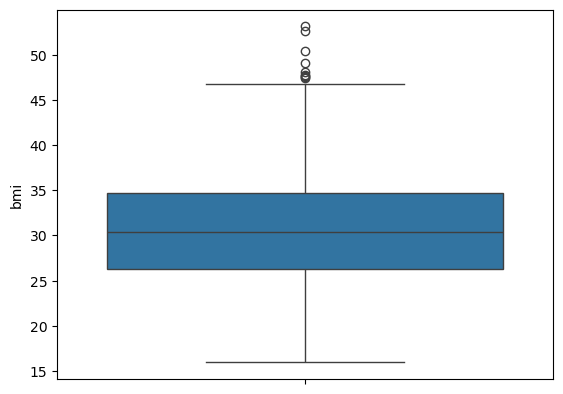

In [83]:
sns.boxplot(df['bmi'])

<Axes: ylabel='charges'>

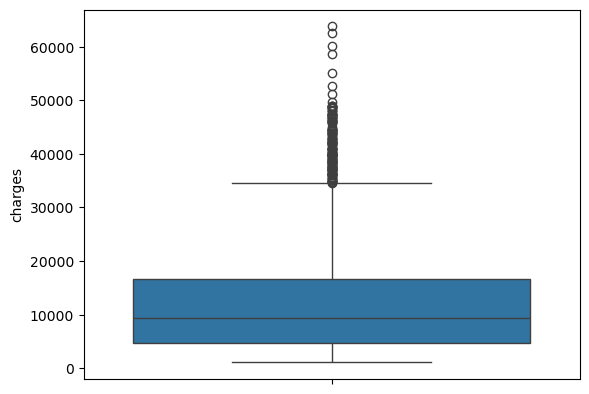

In [84]:
sns.boxplot(df['charges'])

In [85]:
#we need to treat the outliers of bmi and charges columns
#for bmi
q1=df['bmi'].quantile(0.25)
q2=df['bmi'].quantile(0.5)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
lowlim=q1-1.5*iqr
upplim=q3+1.5*iqr
print(lowlim)
print(upplim)

13.7
47.290000000000006


<Axes: ylabel='bmi'>

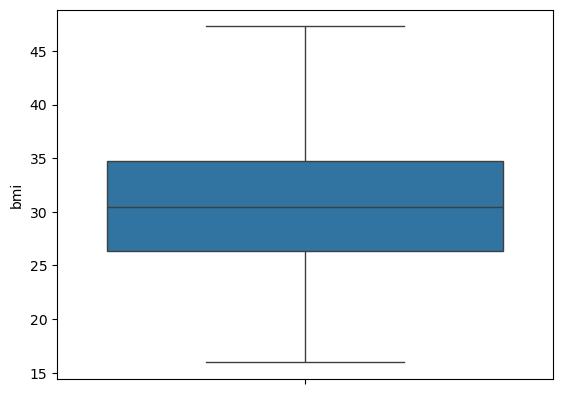

In [86]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.7}, max_capping_dict={'bmi':47.290})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [87]:
#for charges
q1=df['charges'].quantile(0.25)
q2=df['charges'].quantile(0.5)
q3=df['charges'].quantile(0.75)
iqr=q3-q1
lowlim=q1-1.5*iqr
upplim=q3+1.5*iqr
print(lowlim)
print(upplim)

-13109.1508975
34489.350562499996


<Axes: ylabel='charges'>

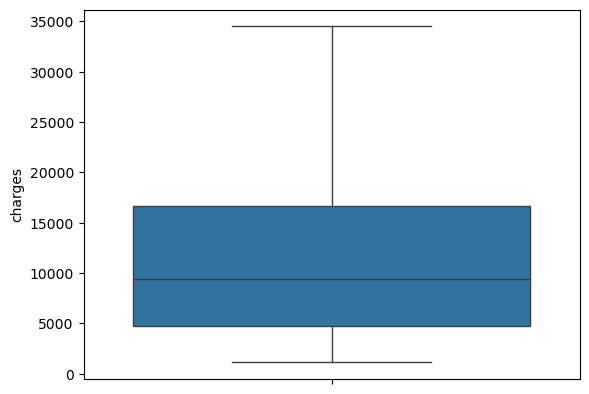

In [88]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'charges':-13109.1508975}, max_capping_dict={'charges':34489.350562499996})
df[['charges']]=arb.fit_transform(df[['charges']])
sns.boxplot(df['charges'])

# Model Development

In [108]:
#spliting the dataset
X = df.drop('charges',axis=1).values
y = df['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [113]:
#importing all necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Linear Regression 

In [111]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3.5 ms


LinearRegression()

In [114]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.743
R2_score (train) : 0.737
R2_score (test) : 0.785
RMSE : 4836.591


## Support Vector Regression

In [116]:
svr=SVR()
svr.fit(X_train, y_train)
cv_svr = cross_val_score(estimator = svr, X = X, y = y, cv = 10)

y_pred_svr_train = svr.predict(X_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV Support Vector Regression : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV Support Vector Regression : -0.095
R2_score (train) : -0.087
R2_score (test) : -0.057
RMSE : 10713.435


## Random Forest Regressor

In [123]:
rfmodel=RandomForestRegressor()
rfmodel.fit(X_train, y_train)
cv_rfmodel = cross_val_score(estimator = rfmodel, X = X, y = y, cv = 10)

y_pred_rfmodel_train = rfmodel.predict(X_train)
r2_score_rfmodel_train = r2_score(y_train, y_pred_rfmodel_train)

y_pred_rfmodel_test = rfmodel.predict(X_test)
r2_score_rfmodel_test = r2_score(y_test, y_pred_rfmodel_test)

rmse_rfmodel = (np.sqrt(mean_squared_error(y_test, y_pred_rfmodel_test)))

print('CV Random Forest Regression  : {0:.3f}'.format(cv_rfmodel.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_rfmodel_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_rfmodel_test))
print('RMSE : {0:.3f}'.format(rmse_rfmodel))

estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print('Hyperparametertuning:')
rfmodel=RandomForestRegressor(n_estimators=120)
rfmodel.fit(X_train, y_train)
cv_rfmodel = cross_val_score(estimator = rfmodel, X = X, y = y, cv = 10)

y_pred_rfmodel_train = rfmodel.predict(X_train)
r2_score_rfmodel_train = r2_score(y_train, y_pred_rfmodel_train)

y_pred_rfmodel_test = rfmodel.predict(X_test)
r2_score_rfmodel_test = r2_score(y_test, y_pred_rfmodel_test)

rmse_rfmodel = (np.sqrt(mean_squared_error(y_test, y_pred_rfmodel_test)))

print('CV Random Forest Regression  : {0:.3f}'.format(cv_rfmodel.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_rfmodel_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_rfmodel_test))
print('RMSE : {0:.3f}'.format(rmse_rfmodel))

CV Random Forest Regression  : 0.790
R2_score (train) : 0.968
R2_score (test) : 0.834
RMSE : 4240.750
Hyperparametertuning:
CV Random Forest Regression  : 0.790
R2_score (train) : 0.969
R2_score (test) : 0.838
RMSE : 4196.863


## Gradient Boosting Regressor

In [125]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train, y_train)
cv_gbmodel = cross_val_score(estimator = gbmodel, X = X, y = y, cv = 10)

y_pred_gbmodel_train = gbmodel.predict(X_train)
r2_score_gbmodel_train = r2_score(y_train, y_pred_gbmodel_train)

y_pred_gbmodel_test = gbmodel.predict(X_test)
r2_score_gbmodel_test = r2_score(y_test, y_pred_gbmodel_test)

rmse_gbmodel = (np.sqrt(mean_squared_error(y_test, y_pred_gbmodel_test)))

print('CV Gradient Boosting Regressor  : {0:.3f}'.format(cv_gbmodel.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_gbmodel_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_gbmodel_test))
print('RMSE : {0:.3f}'.format(rmse_gbmodel))

estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print('Hyperparametertuning:')
gbmodel=GradientBoostingRegressor(n_estimators=20,learning_rate=0.2)
gbmodel.fit(X_train, y_train)
cv_gbmodel = cross_val_score(estimator = gbmodel, X = X, y = y, cv = 10)

y_pred_gbmodel_train = gbmodel.predict(X_train)
r2_score_gbmodel_train = r2_score(y_train, y_pred_gbmodel_train)

y_pred_gbmodel_test = gbmodel.predict(X_test)
r2_score_gbmodel_test = r2_score(y_test, y_pred_gbmodel_test)

rmse_gbmodel = (np.sqrt(mean_squared_error(y_test, y_pred_gbmodel_test)))

print('CV Gradient Boosting Regressor  : {0:.3f}'.format(cv_gbmodel.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_gbmodel_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_gbmodel_test))
print('RMSE : {0:.3f}'.format(rmse_gbmodel))

CV Gradient Boosting Regressor  : 0.817
R2_score (train) : 0.867
R2_score (test) : 0.844
RMSE : 4118.959
Hyperparametertuning:
CV Gradient Boosting Regressor  : 0.822
R2_score (train) : 0.843
R2_score (test) : 0.849
RMSE : 4044.151


## XGBRegressor

In [126]:
xgbmodel=XGBRegressor()
xgbmodel.fit(X_train, y_train)
cv_xgbmodel = cross_val_score(estimator = xgbmodel, X = X, y = y, cv = 10)

y_pred_xgbmodel_train = xgbmodel.predict(X_train)
r2_score_xgbmodel_train = r2_score(y_train, y_pred_xgbmodel_train)

y_pred_xgbmodel_test = xgbmodel.predict(X_test)
r2_score_xgbmodel_test = r2_score(y_test, y_pred_xgbmodel_test)

rmse_xgbmodel = (np.sqrt(mean_squared_error(y_test, y_pred_xgbmodel_test)))

print('CV XGBRegressor  : {0:.3f}'.format(cv_xgbmodel.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_xgbmodel_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_xgbmodel_test))
print('RMSE : {0:.3f}'.format(rmse_xgbmodel))

estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print('Hyperparametertuning:')
xgbmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgbmodel.fit(X_train, y_train)
cv_xgbmodel = cross_val_score(estimator = xgbmodel, X = X, y = y, cv = 10)

y_pred_xgbmodel_train = xgbmodel.predict(X_train)
r2_score_xgbmodel_train = r2_score(y_train, y_pred_xgbmodel_train)

y_pred_xgbmodel_test = xgbmodel.predict(X_test)
r2_score_xgbmodel_test = r2_score(y_test, y_pred_xgbmodel_test)

rmse_xgbmodel = (np.sqrt(mean_squared_error(y_test, y_pred_xgbmodel_test)))

print('CV Random Forest Regression  : {0:.3f}'.format(cv_xgbmodel.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_xgbmodel_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_xgbmodel_test))
print('RMSE : {0:.3f}'.format(rmse_xgbmodel))

CV XGBRegressor  : 0.755
R2_score (train) : 0.991
R2_score (test) : 0.805
RMSE : 4604.929
Hyperparametertuning:
CV Random Forest Regression  : 0.824
R2_score (train) : 0.841
R2_score (test) : 0.846
RMSE : 4082.822


In [129]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rfmodel, r2_score_rfmodel_train, r2_score_rfmodel_test, cv_rfmodel.mean()),
          ('Gradient Boosting Regressor', rmse_gbmodel, r2_score_gbmodel_train, r2_score_gbmodel_test, cv_gbmodel.mean()),
          ('XGBRegressor', rmse_xgbmodel, r2_score_xgbmodel_train, r2_score_xgbmodel_test, cv_xgbmodel.mean())
         ]


In [130]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,4836.591069,0.737439,0.784512,0.743176
1,Support Vector Regression,10713.435219,-0.086742,-0.057308,-0.094561
2,Random Forest Regression,4196.862758,0.968762,0.837747,0.789825
3,Gradient Boosting Regressor,4044.150792,0.842533,0.849340,0.822400
4,XGBRegressor,4082.821711,0.840818,0.846445,0.824291


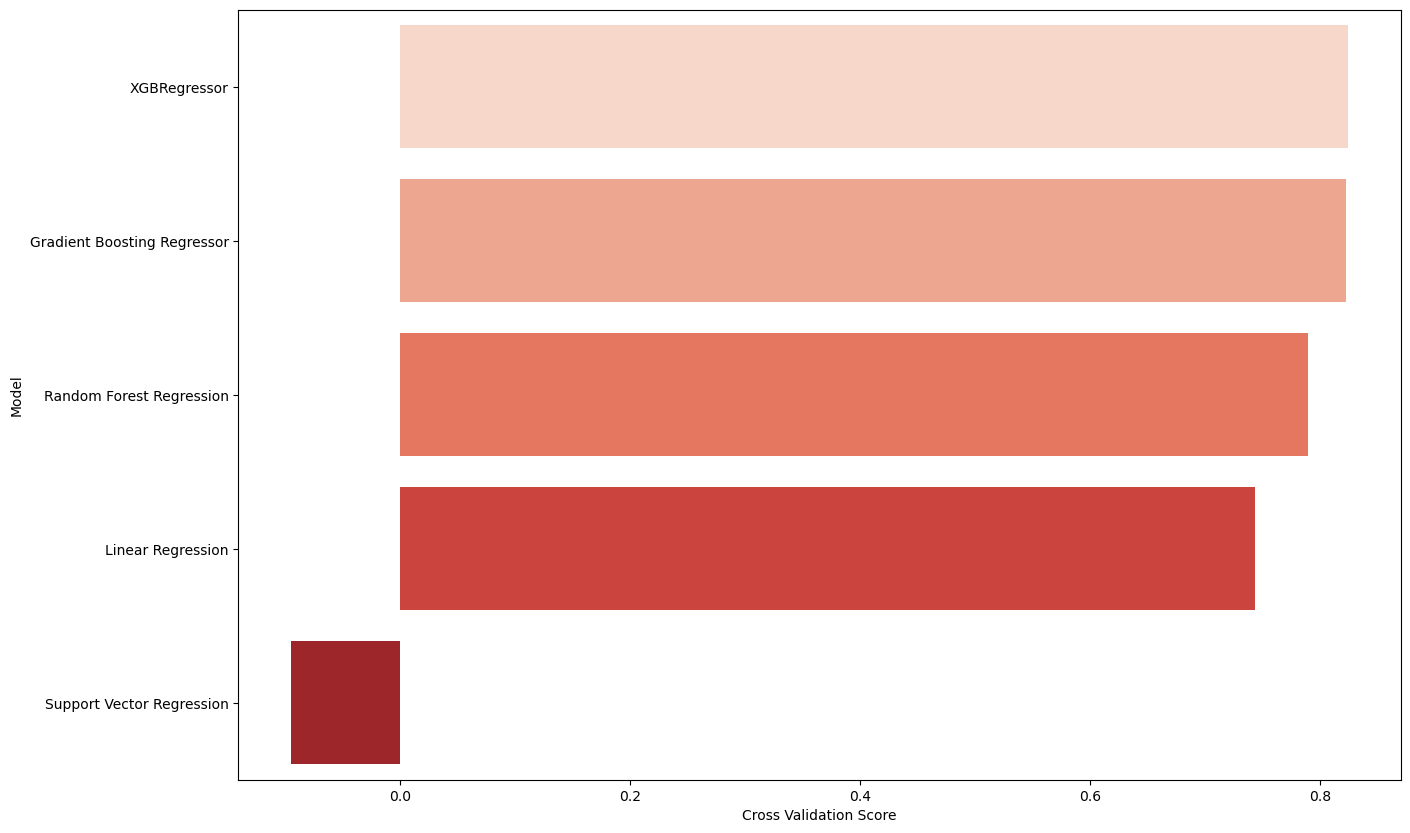

In [131]:
plt.figure(figsize=(15,10))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()


*From the above table we can observe that XGBoost is the best model*

# Saving The Model

In [132]:
from pickle import dump
dump(xgbmodel,open('Medinsurancemodel.pkl','wb'))

## Predict on a new data

In [146]:
new_data=pd.DataFrame({'age':27,'sex':'male','bmi':27.9,'children':1,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data['sex']=new_data['sex'].map({'male':0,'female':1})
new_data['region']=new_data['region'].map({'southeast': 0, 'southwest':1, 'northwest': 2, 'northeast':3})
new_data

,age,sex,bmi,children,smoker,region
0,27,0,27.9,1,1,3


In [147]:
xgbmodel.predict(new_data)

array([19018.268], dtype=float32)